In [1]:
import pyupbit

In [ ]:
import pyupbit
import time
from collections import deque

In [ ]:
tickers = []
# 코인 종가를 담을 deque 변수
ma5 = deque(maxlen = 5)
ma20 = deque(maxlen = 20)
ma60 = deque(maxlen = 60)

# 원화로 거래 가능한 코인 리스트
tickers = pyupbit.get_tickers(fiat = 'KRW')
# ['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC'] ... 등등

# 로그인 정보 저장
#upbit = pyupbit.Upbit('wFAuJTKFqiSCj1xWXUW9juzMSlCDELPqcN2j2t2b', 'Z5bI1gRI2C7SyhvlqPOMbMsDQcbcKLrpcxe6wmGL')

'''get_ohlcv 함수는 고가/시가/저가/종가/거래량을 DataFrame으로 반환합니다'''
df = pyupbit.get_ohlcv(tickers[1], interval='day', to = '20191231') # 일봉 데이터 프레임 생성

ma5.extend(df['close'])    # ma20 변수에 종가 넣기
ma20.extend(df['close'])    # ma60 변수에 종가 넣기
ma60.extend(df['close'])   # ma120 변수에 종가 넣기

df['date'] = df.index

ma5 = df['close'].rolling(window=5).mean()
df.insert(len(df.columns), "MA5", ma5)

ma20 = df['close'].rolling(window=20).mean()
df.insert(len(df.columns), "MA20", ma20)

ma60 = df['close'].rolling(window=60).mean()
df.insert(len(df.columns), "MA60", ma60)
print(df)
print(type(df))

                         open      high       low     close         volume  \
2019-06-14 09:00:00  308400.0  320000.0  305550.0  317800.0   93532.287920   
2019-06-15 09:00:00  317900.0  326500.0  313000.0  319500.0  102801.950895   
2019-06-16 09:00:00  319500.0  330500.0  317000.0  320150.0  117198.507376   
2019-06-17 09:00:00  320200.0  326050.0  319550.0  324100.0   92232.913059   
2019-06-18 09:00:00  324350.0  324900.0  314650.0  317800.0   77871.250801   
...                       ...       ...       ...       ...            ...   
2019-12-26 09:00:00  145300.0  150950.0  142650.0  145200.0   23479.151966   
2019-12-27 09:00:00  145300.0  146200.0  141150.0  145450.0   20113.036693   
2019-12-28 09:00:00  145550.0  147950.0  144950.0  146600.0   17122.131080   
2019-12-29 09:00:00  146600.0  153500.0  145750.0  150950.0   34268.859838   
2019-12-30 09:00:00  150950.0  154000.0  148700.0  149350.0   36088.054322   

                            value                date       MA5

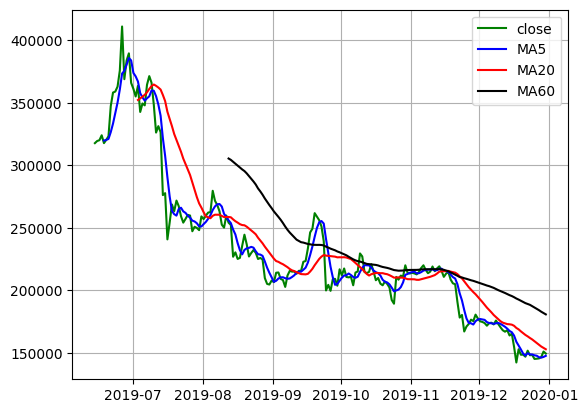

In [ ]:

import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot(df['date'], df['close'], 'g', label = 'close')
plt.plot(df['date'], df['MA5'], 'b', label = 'MA5')
plt.plot(df['date'], df['MA20'], 'r', label = 'MA20')
plt.plot(df['date'], df['MA60'], 'k', label = 'MA60')
plt.legend()
plt.grid()
plt.show()

In [ ]:
tickers

['KRW-BTC',
 'KRW-ETH',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-LTC',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'KRW-SBD',
 'KRW-POWR',
 'KRW-BTG',
 'KRW-ICX',
 'KRW-EOS',
 'KRW-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLY',
 'KRW-ZRX',
 'KRW-LOOM',
 'KRW-BCH',
 'KRW-BAT',
 'KRW-IOST',
 'KRW-RFR',
 'KRW-CVC',
 'KRW-IQ',
 'KRW-IOTA',
 'KRW-MFT',
 'KRW-ONG',
 'KRW-GAS',
 'KRW-UPP',
 'KRW-ELF',
 'KRW-KNC',
 'KRW-BSV',
 'KRW-THETA',
 'KRW-QKC',
 'KRW-BTT',
 'KRW-MOC',
 'KRW-ENJ',
 'KRW-TFUEL',
 'KRW-MANA',
 'KRW-ANKR',
 'KRW-AERGO',
 'KRW-ATOM',
 'KRW-TT',
 'KRW-CRE',
 'KRW-MBL',
 'KRW-WAXP',
 'KRW-HBAR',
 'KRW-MED',
 'KRW-MLK',
 'KRW-STPT',
 'KRW-ORBS',
 'KRW-VET',
 'KRW-CHZ',
 'KRW-STMX',
 'KRW-DKA',
 'KRW-HIVE',
 'KRW-KAVA',
 'KRW-AHT',
 'KRW-LINK',
 'KRW-XTZ',
 'KRW-BORA',
 'KRW-JST',
 'KRW-CRO',
 'KRW-TON',
 'KRW-SXP',
 'KRW-HUNT',

In [ ]:
import time
import ccxt
import pandas as pd
from datetime import datetime

In [ ]:
binance = ccxt.binance()
df = binance.fetch_ohlcv('ETC/BUSD'\
    , timeframe = '1d'\
    , limit = 12)
dolor_total = []
df = pd.DataFrame(df, columns = ['date', 'open', 'high', 'low', 'close', 'volume'])
for i in range(len(df)):
    now = df.iloc[i][0]
    date = datetime.fromtimestamp(int(now)/1000).strftime('%Y-%m-%d %H:%M:%S')
    df.loc[i, 'date'] = date
    #df.insert(len(df.columns), "dolor", float(df.loc[i, 'close'])*float(df.loc[i, 'volume']))
    dolor = float(df.loc[i, 'close']) * float(df.loc[i, 'volume'])
    dolor_total.append(dolor)
df.insert(len(df.columns), "dolor", dolor_total)
df

,date,open,high,low,close,volume,dolor
0,2022-08-18 09:00:00,40.29,41.85,39.03,39.56,588211.68,2.326965e+07
1,2022-08-19 09:00:00,39.55,39.65,32.20,32.93,1399457.34,4.608413e+07
2,2022-08-20 09:00:00,32.92,34.58,31.24,32.79,837871.30,2.747380e+07
3,2022-08-21 09:00:00,32.76,34.19,32.12,33.65,470877.78,1.584504e+07
4,2022-08-22 09:00:00,33.68,34.12,31.22,34.06,518844.92,1.767186e+07
5,2022-08-23 09:00:00,34.06,34.72,32.25,34.31,504748.67,1.731793e+07
6,2022-08-24 09:00:00,34.33,36.87,32.90,35.30,874483.19,3.086926e+07
7,2022-08-25 09:00:00,35.30,38.10,35.22,37.09,714826.47,2.651291e+07
8,2022-08-26 09:00:00,37.09,38.39,33.46,33.90,1003801.15,3.402886e+07
9,2022-08-27 09:00:00,33.91,34.43,31.96,33.01,545059.08,1.799240e+07


In [ ]:
binance = ccxt.binance()
df = binance.fetch_ohlcv('ETC/BUSD'\
    , timeframe = '1d'\
    , limit = 12)
dpc_total = []
cs_total = []
df = pd.DataFrame(df, columns = ['date', 'open', 'high', 'low', 'close', 'volume'])
for i in range(len(df)):
    now = df.iloc[i][0]
    date = datetime.fromtimestamp(int(now)/1000).strftime('%Y-%m-%d %H:%M:%S')
    df.loc[i, 'date'] = date
    if i > 0:
        dpc = (float(df.loc[i, 'close']) - float(df.loc[i-1, 'close']))/float(df.loc[i-1, 'close'])*100
        dpc_total.append(dpc)
    else:
        dpc = 0
        dpc_total.append(dpc)
df.insert(len(df.columns), "dpc", dpc_total)
for i in range(len(df)):
    if i > 0:
        cs = float(df.loc[i, 'dpc']) + float(cs)
        cs_total.append(cs)
    else:
        cs = 0
        cs_total.append(cs)
df.insert(len(df.columns), 'cs', cs_total)
df

,date,open,high,low,close,volume,dpc,cs
0,2022-08-18 09:00:00,40.29,41.85,39.03,39.56,588211.68,0.000000,0.000000
1,2022-08-19 09:00:00,39.55,39.65,32.20,32.93,1399457.34,-16.759353,-16.759353
2,2022-08-20 09:00:00,32.92,34.58,31.24,32.79,837871.30,-0.425144,-17.184497
3,2022-08-21 09:00:00,32.76,34.19,32.12,33.65,470877.78,2.622751,-14.561746
4,2022-08-22 09:00:00,33.68,34.12,31.22,34.06,518844.92,1.218425,-13.343321
5,2022-08-23 09:00:00,34.06,34.72,32.25,34.31,504748.67,0.733999,-12.609322
6,2022-08-24 09:00:00,34.33,36.87,32.90,35.30,874483.19,2.885456,-9.723866
7,2022-08-25 09:00:00,35.30,38.10,35.22,37.09,714826.47,5.070822,-4.653045
8,2022-08-26 09:00:00,37.09,38.39,33.46,33.90,1003801.15,-8.600701,-13.253746
9,2022-08-27 09:00:00,33.91,34.43,31.96,33.01,545059.08,-2.625369,-15.879115
